# Neural Network for VO2max prediction

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, normalize
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from keras.regularizers import l2

#Note: Use cross validation, split data different test and train (validation - small dataset))

In [151]:
# import dataset using pandas and convert to array for processing
dataset = pd.read_csv('Data.csv')
dataset

,Height,Weight,Age,Gender,EE,HRmax,VO2max
0,188.0,78.4,32,M,17.580220,163.500000,44.847500
1,175.0,59.0,22,F,14.239469,189.400000,48.269388
2,170.0,58.1,23,F,12.081421,162.700000,41.588370
3,168.5,54.0,30,F,12.164488,182.300000,45.053660
4,191.0,98.6,30,M,19.572100,198.537406,39.700000
5,178.0,63.0,26,F,13.341879,154.300000,42.355170
6,176.7,82.0,27,M,16.079811,199.800000,39.219050
7,177.4,66.3,29,F,14.250177,151.200000,42.986960
8,162.6,57.3,25,F,11.789054,173.354021,41.148530
9,178.0,89.2,27,M,19.162771,186.564176,42.965854


In [188]:
# train dataset (omit variables for different number of predictor variables) Independent variables
train = dataset[['Height', 'Weight', 'Age','Gender','EE','HRmax']].values
train.shape
train

array([[188.        ,  78.4       ,  32.        ,  17.58022   ,
        163.5       ],
       [175.        ,  59.        ,  22.        ,  14.23946939,
        189.4       ],
       [170.        ,  58.1       ,  23.        ,  12.08142149,
        162.7       ],
       [168.5       ,  54.        ,  30.        ,  12.1644882 ,
        182.3       ],
       [191.        ,  98.6       ,  30.        ,  19.5721    ,
        198.5374064 ],
       [178.        ,  63.        ,  26.        ,  13.34187855,
        154.3       ],
       [176.7       ,  82.        ,  27.        ,  16.0798105 ,
        199.8       ],
       [177.4       ,  66.3       ,  29.        ,  14.25017724,
        151.2       ],
       [162.6       ,  57.3       ,  25.        ,  11.78905385,
        173.3540213 ],
       [178.        ,  89.2       ,  27.        ,  19.16277073,
        186.5641757 ],
       [174.        ,  67.5       ,  22.        ,  12.91275   ,
        168.4616298 ],
       [179.8       ,  73.9       ,  29.   

In [189]:
# Test data set - Dependent Variable
test = dataset[['VO2max']].values
test

array([[44.8475    ],
       [48.26938776],
       [41.58837   ],
       [45.05366   ],
       [39.7       ],
       [42.35517   ],
       [39.21905   ],
       [42.98696   ],
       [41.14853   ],
       [42.96585366],
       [38.26      ],
       [42.78966   ],
       [41.77911   ],
       [33.24528   ],
       [45.29231   ],
       [43.92754   ],
       [42.44865   ],
       [38.187     ]])

In [170]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column (Column Gender) 1 - Males, 0 - Females
train[:,3] = np.array(labelencoder.fit_transform(train[:,3]))
#train
# normalize values mean =0 and variance = 1
train = normalize(train)
train

array([[0.9841718 , 0.05758452, 0.1675186 , 0.00523496],
       [0.99204691, 0.01700652, 0.12471447, 0.        ],
       [0.99090417, 0.0116577 , 0.13406351, 0.        ],
       [0.98451772, 0.        , 0.17528505, 0.        ],
       [0.98407861, 0.08758815, 0.15456732, 0.00515224],
       [0.98925535, 0.02223046, 0.14449797, 0.        ],
       [0.98590712, 0.0725342 , 0.15064795, 0.00557955],
       [0.9865188 , 0.02780493, 0.16126857, 0.        ],
       [0.98836749, 0.00607852, 0.15196302, 0.        ],
       [0.98479409, 0.08852082, 0.14937888, 0.00553255],
       [0.9915214 , 0.03419039, 0.12536477, 0.        ],
       [0.98627521, 0.04388321, 0.15907665, 0.0054854 ],
       [0.98495971, 0.06603082, 0.15957448, 0.00550257],
       [0.98914182, 0.05859845, 0.13477643, 0.        ],
       [0.98579451, 0.03940926, 0.16326694, 0.        ],
       [0.98182067, 0.04855157, 0.18341705, 0.00539462],
       [0.98129552, 0.07327007, 0.17794159, 0.00523358],
       [0.97989335, 0.08918932,

In [190]:
# split into test train
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.33, random_state = 1) # use 
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [192]:
# Neural Network with 2 hidden, 1 input and 1 output layer 5000 epoch batch size 10
model = Sequential()
model.add(Dense(32 , kernel_initializer='normal', activation = 'elu', input_shape = (train.shape[1],)))
model.add(Dense(16, activation= 'elu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear'))
opt=Adam(learning_rate=0.02) # learning rate =0.02
model.compile(optimizer = opt, loss = 'mean_squared_logarithmic_error')
history = model.fit(x = X_train, y = y_train, epochs = 5000, batch_size=17, validation_data=(X_test, y_test))

Epoch 1/5000
1/1 [==============================] - 1s 538ms/step - loss: 13.1571 - val_loss: 0.8380
Epoch 2/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.8265 - val_loss: 0.2060
Epoch 3/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1943 - val_loss: 0.0228
Epoch 4/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0144 - val_loss: 0.0457
Epoch 5/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0409 - val_loss: 0.1468
Epoch 6/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1448 - val_loss: 0.2662
Epoch 7/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.2665 - val_loss: 0.3765
Epoch 8/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.3785 - val_loss: 0.4645
Epoch 9/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.4677 - val_loss: 0.5251
Epoch 10/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.5291 - val_loss: 0.5548
Epoch 1

Epoch 83/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0076 - val_loss: 0.0153
Epoch 84/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0077 - val_loss: 0.0152
Epoch 85/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0076 - val_loss: 0.0150
Epoch 86/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.0074 - val_loss: 0.0149
Epoch 87/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.0073 - val_loss: 0.0148
Epoch 88/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.0073 - val_loss: 0.0148
Epoch 89/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.0073 - val_loss: 0.0148
Epoch 90/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0074 - val_loss: 0.0148
Epoch 91/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0074 - val_loss: 0.0148
Epoch 92/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0074 - val_loss: 0.0147


1/1 [==============================] - 0s 39ms/step - loss: 0.0052 - val_loss: 0.0119
Epoch 246/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0052 - val_loss: 0.0118
Epoch 247/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0052 - val_loss: 0.0118
Epoch 248/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0052 - val_loss: 0.0118
Epoch 249/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.0052 - val_loss: 0.0118
Epoch 250/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0051 - val_loss: 0.0117
Epoch 251/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0051 - val_loss: 0.0117
Epoch 252/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.0051 - val_loss: 0.0117
Epoch 253/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.0051 - val_loss: 0.0117
Epoch 254/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0051 - val_loss: 0.0116
Epoch

1/1 [==============================] - 0s 47ms/step - loss: 0.0038 - val_loss: 0.0097
Epoch 327/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0038 - val_loss: 0.0097
Epoch 328/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0038 - val_loss: 0.0097
Epoch 329/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0038 - val_loss: 0.0096
Epoch 330/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0037 - val_loss: 0.0096
Epoch 331/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.0037 - val_loss: 0.0096
Epoch 332/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.0037 - val_loss: 0.0095
Epoch 333/5000
1/1 [==============================] - 0s 76ms/step - loss: 0.0037 - val_loss: 0.0095
Epoch 334/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.0037 - val_loss: 0.0095
Epoch 335/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.0037 - val_loss: 0.0095
Epoch

1/1 [==============================] - 0s 39ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 489/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 490/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 491/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 492/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 493/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 494/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0021 - val_loss: 0.0061
Epoch 495/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0021 - val_loss: 0.0061
Epoch 496/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0021 - val_loss: 0.0061
Epoch 497/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0021 - val_loss: 0.0061
Epoch

1/1 [==============================] - 0s 29ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 651/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 652/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 653/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 654/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 655/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 656/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 657/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 658/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch 659/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch

1/1 [==============================] - 0s 43ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 813/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 814/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 815/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 816/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 817/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 818/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 819/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 820/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 821/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch

1/1 [==============================] - 0s 89ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 975/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 976/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 977/5000
1/1 [==============================] - 0s 84ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 978/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 979/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 980/5000
1/1 [==============================] - 0s 76ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 981/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 982/5000
1/1 [==============================] - 0s 85ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 983/5000
1/1 [==============================] - 0s 88ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch

1/1 [==============================] - 0s 37ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 1135/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 1136/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 1137/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 1138/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 1139/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 1140/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 1141/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 1142/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 1143/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0013 - val_loss: 0.0

1/1 [==============================] - 0s 35ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1295/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1296/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1297/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1298/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1299/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1300/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1301/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1302/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1303/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0011 - val_loss: 0.0

1/1 [==============================] - 0s 53ms/step - loss: 9.1662e-04 - val_loss: 0.0012
Epoch 1452/5000
1/1 [==============================] - 0s 46ms/step - loss: 9.1544e-04 - val_loss: 0.0012
Epoch 1453/5000
1/1 [==============================] - 0s 47ms/step - loss: 9.1426e-04 - val_loss: 0.0012
Epoch 1454/5000
1/1 [==============================] - 0s 52ms/step - loss: 9.1309e-04 - val_loss: 0.0012
Epoch 1455/5000
1/1 [==============================] - 0s 45ms/step - loss: 9.1190e-04 - val_loss: 0.0012
Epoch 1456/5000
1/1 [==============================] - 0s 51ms/step - loss: 9.1073e-04 - val_loss: 0.0012
Epoch 1457/5000
1/1 [==============================] - 0s 46ms/step - loss: 9.0956e-04 - val_loss: 0.0012
Epoch 1458/5000
1/1 [==============================] - 0s 48ms/step - loss: 9.0839e-04 - val_loss: 0.0012
Epoch 1459/5000
1/1 [==============================] - 0s 54ms/step - loss: 9.0721e-04 - val_loss: 0.0012
Epoch 1460/5000
1/1 [==============================] - 0s 51ms

1/1 [==============================] - 0s 35ms/step - loss: 8.2890e-04 - val_loss: 9.7237e-04
Epoch 1529/5000
1/1 [==============================] - 0s 40ms/step - loss: 8.2781e-04 - val_loss: 9.6959e-04
Epoch 1530/5000
1/1 [==============================] - 0s 35ms/step - loss: 8.2672e-04 - val_loss: 9.6689e-04
Epoch 1531/5000
1/1 [==============================] - 0s 37ms/step - loss: 8.2563e-04 - val_loss: 9.6415e-04
Epoch 1532/5000
1/1 [==============================] - 0s 36ms/step - loss: 8.2454e-04 - val_loss: 9.6140e-04
Epoch 1533/5000
1/1 [==============================] - 0s 35ms/step - loss: 8.2346e-04 - val_loss: 9.5869e-04
Epoch 1534/5000
1/1 [==============================] - 0s 35ms/step - loss: 8.2237e-04 - val_loss: 9.5600e-04
Epoch 1535/5000
1/1 [==============================] - 0s 36ms/step - loss: 8.2128e-04 - val_loss: 9.5328e-04
Epoch 1536/5000
1/1 [==============================] - 0s 37ms/step - loss: 8.2020e-04 - val_loss: 9.5061e-04
Epoch 1537/5000
1/1 [=====

1/1 [==============================] - 0s 40ms/step - loss: 6.8537e-04 - val_loss: 6.6162e-04
Epoch 1677/5000
1/1 [==============================] - 0s 37ms/step - loss: 6.8455e-04 - val_loss: 6.6024e-04
Epoch 1678/5000
1/1 [==============================] - 0s 37ms/step - loss: 6.8372e-04 - val_loss: 6.5887e-04
Epoch 1679/5000
1/1 [==============================] - 0s 36ms/step - loss: 6.8290e-04 - val_loss: 6.5742e-04
Epoch 1680/5000
1/1 [==============================] - 0s 39ms/step - loss: 6.8208e-04 - val_loss: 6.5607e-04
Epoch 1681/5000
1/1 [==============================] - 0s 37ms/step - loss: 6.8126e-04 - val_loss: 6.5471e-04
Epoch 1682/5000
1/1 [==============================] - 0s 36ms/step - loss: 6.8044e-04 - val_loss: 6.5330e-04
Epoch 1683/5000
1/1 [==============================] - 0s 35ms/step - loss: 6.7963e-04 - val_loss: 6.5199e-04
Epoch 1684/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.7881e-04 - val_loss: 6.5063e-04
Epoch 1685/5000
1/1 [=====

1/1 [==============================] - 0s 91ms/step - loss: 5.8623e-04 - val_loss: 5.4849e-04
Epoch 1825/5000
1/1 [==============================] - 0s 82ms/step - loss: 5.8572e-04 - val_loss: 5.4831e-04
Epoch 1826/5000
1/1 [==============================] - 0s 78ms/step - loss: 5.8521e-04 - val_loss: 5.4814e-04
Epoch 1827/5000
1/1 [==============================] - 0s 80ms/step - loss: 5.8470e-04 - val_loss: 5.4799e-04
Epoch 1828/5000
1/1 [==============================] - 0s 78ms/step - loss: 5.8420e-04 - val_loss: 5.4784e-04
Epoch 1829/5000
1/1 [==============================] - 0s 101ms/step - loss: 5.8369e-04 - val_loss: 5.4769e-04
Epoch 1830/5000
1/1 [==============================] - 0s 75ms/step - loss: 5.8319e-04 - val_loss: 5.4757e-04
Epoch 1831/5000
1/1 [==============================] - 0s 76ms/step - loss: 5.8269e-04 - val_loss: 5.4741e-04
Epoch 1832/5000
1/1 [==============================] - 0s 53ms/step - loss: 5.8219e-04 - val_loss: 5.4731e-04
Epoch 1833/5000
1/1 [====

1/1 [==============================] - 0s 73ms/step - loss: 9.1777e-04 - val_loss: 0.0011
Epoch 1974/5000
1/1 [==============================] - 0s 97ms/step - loss: 7.0896e-04 - val_loss: 5.7790e-04
Epoch 1975/5000
1/1 [==============================] - 0s 39ms/step - loss: 5.4151e-04 - val_loss: 4.4494e-04
Epoch 1976/5000
1/1 [==============================] - 0s 44ms/step - loss: 6.6701e-04 - val_loss: 0.0013
Epoch 1977/5000
1/1 [==============================] - 0s 39ms/step - loss: 8.2123e-04 - val_loss: 4.4297e-04
Epoch 1978/5000
1/1 [==============================] - 0s 49ms/step - loss: 6.9910e-04 - val_loss: 6.7598e-04
Epoch 1979/5000
1/1 [==============================] - 0s 122ms/step - loss: 5.5194e-04 - val_loss: 7.8008e-04
Epoch 1980/5000
1/1 [==============================] - 0s 35ms/step - loss: 5.8276e-04 - val_loss: 4.4036e-04
Epoch 1981/5000
1/1 [==============================] - 0s 41ms/step - loss: 6.8810e-04 - val_loss: 0.0010
Epoch 1982/5000
1/1 [================

1/1 [==============================] - 0s 38ms/step - loss: 5.1005e-04 - val_loss: 6.2897e-04
Epoch 2122/5000
1/1 [==============================] - 0s 41ms/step - loss: 5.0989e-04 - val_loss: 6.3032e-04
Epoch 2123/5000
1/1 [==============================] - 0s 40ms/step - loss: 5.0974e-04 - val_loss: 6.3022e-04
Epoch 2124/5000
1/1 [==============================] - 0s 40ms/step - loss: 5.0957e-04 - val_loss: 6.3136e-04
Epoch 2125/5000
1/1 [==============================] - 0s 41ms/step - loss: 5.0942e-04 - val_loss: 6.3149e-04
Epoch 2126/5000
1/1 [==============================] - 0s 41ms/step - loss: 5.0926e-04 - val_loss: 6.3241e-04
Epoch 2127/5000
1/1 [==============================] - 0s 38ms/step - loss: 5.0910e-04 - val_loss: 6.3277e-04
Epoch 2128/5000
1/1 [==============================] - 0s 36ms/step - loss: 5.0895e-04 - val_loss: 6.3345e-04
Epoch 2129/5000
1/1 [==============================] - 0s 44ms/step - loss: 5.0879e-04 - val_loss: 6.3400e-04
Epoch 2130/5000
1/1 [=====

Epoch 2197/5000
1/1 [==============================] - 0s 38ms/step - loss: 6.7692e-04 - val_loss: 6.9575e-04
Epoch 2198/5000
1/1 [==============================] - 0s 39ms/step - loss: 5.1265e-04 - val_loss: 5.7254e-04
Epoch 2199/5000
1/1 [==============================] - 0s 39ms/step - loss: 7.2358e-04 - val_loss: 0.0015
Epoch 2200/5000
1/1 [==============================] - 0s 39ms/step - loss: 9.2740e-04 - val_loss: 5.7363e-04
Epoch 2201/5000
1/1 [==============================] - 0s 38ms/step - loss: 7.3445e-04 - val_loss: 7.5434e-04
Epoch 2202/5000
1/1 [==============================] - 0s 39ms/step - loss: 5.2706e-04 - val_loss: 8.4742e-04
Epoch 2203/5000
1/1 [==============================] - 0s 39ms/step - loss: 5.6151e-04 - val_loss: 5.6342e-04
Epoch 2204/5000
1/1 [==============================] - 0s 42ms/step - loss: 7.1223e-04 - val_loss: 0.0012
Epoch 2205/5000
1/1 [==============================] - 0s 39ms/step - loss: 7.3219e-04 - val_loss: 5.5045e-04
Epoch 2206/5000
1/

1/1 [==============================] - 0s 42ms/step - loss: 4.9043e-04 - val_loss: 6.9677e-04
Epoch 2346/5000
1/1 [==============================] - 0s 46ms/step - loss: 4.9033e-04 - val_loss: 6.9741e-04
Epoch 2347/5000
1/1 [==============================] - 0s 41ms/step - loss: 4.9023e-04 - val_loss: 6.9771e-04
Epoch 2348/5000
1/1 [==============================] - 0s 41ms/step - loss: 4.9014e-04 - val_loss: 6.9853e-04
Epoch 2349/5000
1/1 [==============================] - 0s 38ms/step - loss: 4.9004e-04 - val_loss: 6.9869e-04
Epoch 2350/5000
1/1 [==============================] - 0s 40ms/step - loss: 4.8995e-04 - val_loss: 6.9959e-04
Epoch 2351/5000
1/1 [==============================] - 0s 36ms/step - loss: 4.8985e-04 - val_loss: 6.9972e-04
Epoch 2352/5000
1/1 [==============================] - 0s 41ms/step - loss: 4.8975e-04 - val_loss: 7.0061e-04
Epoch 2353/5000
1/1 [==============================] - ETA: 0s - loss: 4.8966e-0 - 0s 43ms/step - loss: 4.8966e-04 - val_loss: 7.0080e-0

1/1 [==============================] - 0s 50ms/step - loss: 4.8480e-04 - val_loss: 6.9750e-04
Epoch 2495/5000
1/1 [==============================] - 0s 49ms/step - loss: 4.8396e-04 - val_loss: 6.9489e-04
Epoch 2496/5000
1/1 [==============================] - 0s 50ms/step - loss: 4.8376e-04 - val_loss: 6.7789e-04
Epoch 2497/5000
1/1 [==============================] - 0s 66ms/step - loss: 4.8413e-04 - val_loss: 7.1016e-04
Epoch 2498/5000
1/1 [==============================] - 0s 74ms/step - loss: 4.8440e-04 - val_loss: 6.7681e-04
Epoch 2499/5000
1/1 [==============================] - 0s 72ms/step - loss: 4.8413e-04 - val_loss: 7.0246e-04
Epoch 2500/5000
1/1 [==============================] - 0s 76ms/step - loss: 4.8358e-04 - val_loss: 6.9226e-04
Epoch 2501/5000
1/1 [==============================] - 0s 73ms/step - loss: 4.8322e-04 - val_loss: 6.8676e-04
Epoch 2502/5000
1/1 [==============================] - 0s 68ms/step - loss: 4.8327e-04 - val_loss: 7.0700e-04
Epoch 2503/5000
1/1 [=====

1/1 [==============================] - 0s 41ms/step - loss: 4.7155e-04 - val_loss: 7.5806e-04
Epoch 2643/5000
1/1 [==============================] - 0s 39ms/step - loss: 4.7149e-04 - val_loss: 7.6604e-04
Epoch 2644/5000
1/1 [==============================] - 0s 37ms/step - loss: 4.7144e-04 - val_loss: 7.5677e-04
Epoch 2645/5000
1/1 [==============================] - 0s 40ms/step - loss: 4.7141e-04 - val_loss: 7.6973e-04
Epoch 2646/5000
1/1 [==============================] - 0s 38ms/step - loss: 4.7140e-04 - val_loss: 7.5403e-04
Epoch 2647/5000
1/1 [==============================] - 0s 42ms/step - loss: 4.7145e-04 - val_loss: 7.7571e-04
Epoch 2648/5000
1/1 [==============================] - 0s 50ms/step - loss: 4.7158e-04 - val_loss: 7.4889e-04
Epoch 2649/5000
1/1 [==============================] - 0s 61ms/step - loss: 4.7186e-04 - val_loss: 7.8608e-04
Epoch 2650/5000
1/1 [==============================] - 0s 48ms/step - loss: 4.7242e-04 - val_loss: 7.3984e-04
Epoch 2651/5000
1/1 [=====

1/1 [==============================] - 0s 38ms/step - loss: 4.7434e-04 - val_loss: 6.6051e-04
Epoch 2719/5000
1/1 [==============================] - ETA: 0s - loss: 4.7670e-0 - 0s 41ms/step - loss: 4.7670e-04 - val_loss: 7.6587e-04
Epoch 2720/5000
1/1 [==============================] - 0s 68ms/step - loss: 4.8483e-04 - val_loss: 6.3979e-04
Epoch 2721/5000
1/1 [==============================] - 0s 77ms/step - loss: 4.8411e-04 - val_loss: 7.2857e-04
Epoch 2722/5000
1/1 [==============================] - 0s 112ms/step - loss: 4.7647e-04 - val_loss: 6.9728e-04
Epoch 2723/5000
1/1 [==============================] - 0s 79ms/step - loss: 4.7317e-04 - val_loss: 6.5639e-04
Epoch 2724/5000
1/1 [==============================] - 0s 85ms/step - loss: 4.7735e-04 - val_loss: 7.5260e-04
Epoch 2725/5000
1/1 [==============================] - 0s 95ms/step - loss: 4.8082e-04 - val_loss: 6.5460e-04
Epoch 2726/5000
1/1 [==============================] - 0s 68ms/step - loss: 4.7782e-04 - val_loss: 7.0789e-

1/1 [==============================] - 0s 44ms/step - loss: 4.6074e-04 - val_loss: 7.6255e-04
Epoch 2867/5000
1/1 [==============================] - 0s 46ms/step - loss: 4.6067e-04 - val_loss: 7.6287e-04
Epoch 2868/5000
1/1 [==============================] - 0s 43ms/step - loss: 4.6059e-04 - val_loss: 7.6339e-04
Epoch 2869/5000
1/1 [==============================] - 0s 43ms/step - loss: 4.6051e-04 - val_loss: 7.6371e-04
Epoch 2870/5000
1/1 [==============================] - 0s 36ms/step - loss: 4.6044e-04 - val_loss: 7.6422e-04
Epoch 2871/5000
1/1 [==============================] - 0s 60ms/step - loss: 4.6037e-04 - val_loss: 7.6455e-04
Epoch 2872/5000
1/1 [==============================] - 0s 73ms/step - loss: 4.6030e-04 - val_loss: 7.6505e-04
Epoch 2873/5000
1/1 [==============================] - 0s 72ms/step - loss: 4.6022e-04 - val_loss: 7.6537e-04
Epoch 2874/5000
1/1 [==============================] - 0s 70ms/step - loss: 4.6014e-04 - val_loss: 7.6588e-04
Epoch 2875/5000
1/1 [=====

1/1 [==============================] - 0s 57ms/step - loss: 4.5744e-04 - val_loss: 6.9425e-04
Epoch 3017/5000
1/1 [==============================] - 0s 44ms/step - loss: 4.5765e-04 - val_loss: 7.2615e-04
Epoch 3018/5000
1/1 [==============================] - 0s 45ms/step - loss: 4.5727e-04 - val_loss: 7.0535e-04
Epoch 3019/5000
1/1 [==============================] - 0s 42ms/step - loss: 4.5669e-04 - val_loss: 7.0995e-04
Epoch 3020/5000
1/1 [==============================] - 0s 45ms/step - loss: 4.5648e-04 - val_loss: 7.2328e-04
Epoch 3021/5000
1/1 [==============================] - 0s 42ms/step - loss: 4.5666e-04 - val_loss: 7.0105e-04
Epoch 3022/5000
1/1 [==============================] - 0s 37ms/step - loss: 4.5679e-04 - val_loss: 7.2642e-04
Epoch 3023/5000
1/1 [==============================] - 0s 40ms/step - loss: 4.5658e-04 - val_loss: 7.0862e-04
Epoch 3024/5000
1/1 [==============================] - 0s 51ms/step - loss: 4.5619e-04 - val_loss: 7.1517e-04
Epoch 3025/5000
1/1 [=====

1/1 [==============================] - 0s 52ms/step - loss: 4.4434e-04 - val_loss: 7.8514e-04
Epoch 3165/5000
1/1 [==============================] - 0s 56ms/step - loss: 4.4427e-04 - val_loss: 7.8639e-04
Epoch 3166/5000
1/1 [==============================] - 0s 56ms/step - loss: 4.4420e-04 - val_loss: 7.8577e-04
Epoch 3167/5000
1/1 [==============================] - 0s 56ms/step - loss: 4.4412e-04 - val_loss: 7.8734e-04
Epoch 3168/5000
1/1 [==============================] - ETA: 0s - loss: 4.4405e-0 - 0s 55ms/step - loss: 4.4405e-04 - val_loss: 7.8631e-04
Epoch 3169/5000
1/1 [==============================] - 0s 49ms/step - loss: 4.4397e-04 - val_loss: 7.8840e-04
Epoch 3170/5000
1/1 [==============================] - 0s 59ms/step - loss: 4.4390e-04 - val_loss: 7.8671e-04
Epoch 3171/5000
1/1 [==============================] - 0s 50ms/step - loss: 4.4382e-04 - val_loss: 7.8962e-04
Epoch 3172/5000
1/1 [==============================] - 0s 68ms/step - loss: 4.4375e-04 - val_loss: 7.8690e-0

1/1 [==============================] - 0s 56ms/step - loss: 4.4056e-04 - val_loss: 7.2880e-04
Epoch 3314/5000
1/1 [==============================] - 0s 54ms/step - loss: 4.4045e-04 - val_loss: 7.3053e-04
Epoch 3315/5000
1/1 [==============================] - 0s 47ms/step - loss: 4.4036e-04 - val_loss: 7.2744e-04
Epoch 3316/5000
1/1 [==============================] - 0s 50ms/step - loss: 4.4027e-04 - val_loss: 7.3311e-04
Epoch 3317/5000
1/1 [==============================] - 0s 51ms/step - loss: 4.4018e-04 - val_loss: 7.2903e-04
Epoch 3318/5000
1/1 [==============================] - 0s 47ms/step - loss: 4.4007e-04 - val_loss: 7.3270e-04
Epoch 3319/5000
1/1 [==============================] - 0s 53ms/step - loss: 4.3995e-04 - val_loss: 7.3263e-04
Epoch 3320/5000
1/1 [==============================] - 0s 59ms/step - loss: 4.3986e-04 - val_loss: 7.3167e-04
Epoch 3321/5000
1/1 [==============================] - 0s 50ms/step - loss: 4.3976e-04 - val_loss: 7.3552e-04
Epoch 3322/5000
1/1 [=====

1/1 [==============================] - 0s 83ms/step - loss: 4.3048e-04 - val_loss: 7.7106e-04
Epoch 3462/5000
1/1 [==============================] - 0s 74ms/step - loss: 4.3251e-04 - val_loss: 8.5853e-04
Epoch 3463/5000
1/1 [==============================] - 0s 72ms/step - loss: 4.3633e-04 - val_loss: 7.5461e-04
Epoch 3464/5000
1/1 [==============================] - 0s 77ms/step - loss: 4.4301e-04 - val_loss: 9.1668e-04
Epoch 3465/5000
1/1 [==============================] - 0s 82ms/step - loss: 4.5592e-04 - val_loss: 7.3911e-04
Epoch 3466/5000
1/1 [==============================] - 0s 76ms/step - loss: 4.7809e-04 - val_loss: 0.0011
Epoch 3467/5000
1/1 [==============================] - 0s 70ms/step - loss: 5.2289e-04 - val_loss: 7.6230e-04
Epoch 3468/5000
1/1 [==============================] - 0s 78ms/step - loss: 5.9635e-04 - val_loss: 0.0014
Epoch 3469/5000
1/1 [==============================] - 0s 74ms/step - loss: 7.5644e-04 - val_loss: 9.8017e-04
Epoch 3470/5000
1/1 [=============

1/1 [==============================] - 0s 40ms/step - loss: 4.3591e-04 - val_loss: 7.3942e-04
Epoch 3538/5000
1/1 [==============================] - 0s 40ms/step - loss: 4.3929e-04 - val_loss: 6.5149e-04
Epoch 3539/5000
1/1 [==============================] - 0s 39ms/step - loss: 4.3669e-04 - val_loss: 6.9586e-04
Epoch 3540/5000
1/1 [==============================] - 0s 38ms/step - loss: 4.3289e-04 - val_loss: 7.0783e-04
Epoch 3541/5000
1/1 [==============================] - 0s 38ms/step - loss: 4.3365e-04 - val_loss: 6.5350e-04
Epoch 3542/5000
1/1 [==============================] - 0s 42ms/step - loss: 4.3622e-04 - val_loss: 7.2526e-04
Epoch 3543/5000
1/1 [==============================] - 0s 37ms/step - loss: 4.3556e-04 - val_loss: 6.7376e-04
Epoch 3544/5000
1/1 [==============================] - 0s 41ms/step - loss: 4.3276e-04 - val_loss: 6.7926e-04
Epoch 3545/5000
1/1 [==============================] - 0s 38ms/step - loss: 4.3227e-04 - val_loss: 7.1874e-04
Epoch 3546/5000
1/1 [=====

1/1 [==============================] - 0s 38ms/step - loss: 4.1684e-04 - val_loss: 7.8068e-04
Epoch 3686/5000
1/1 [==============================] - 0s 43ms/step - loss: 4.1675e-04 - val_loss: 7.8125e-04
Epoch 3687/5000
1/1 [==============================] - 0s 38ms/step - loss: 4.1666e-04 - val_loss: 7.8172e-04
Epoch 3688/5000
1/1 [==============================] - 0s 40ms/step - loss: 4.1656e-04 - val_loss: 7.8223e-04
Epoch 3689/5000
1/1 [==============================] - 0s 83ms/step - loss: 4.1647e-04 - val_loss: 7.8274e-04
Epoch 3690/5000
1/1 [==============================] - 0s 84ms/step - loss: 4.1638e-04 - val_loss: 7.8321e-04
Epoch 3691/5000
1/1 [==============================] - 0s 71ms/step - loss: 4.1629e-04 - val_loss: 7.8375e-04
Epoch 3692/5000
1/1 [==============================] - 0s 65ms/step - loss: 4.1620e-04 - val_loss: 7.8419e-04
Epoch 3693/5000
1/1 [==============================] - 0s 70ms/step - loss: 4.1610e-04 - val_loss: 7.8474e-04
Epoch 3694/5000
1/1 [=====

Epoch 3760/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 3761/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0042 - val_loss: 0.0088
Epoch 3762/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0072 - val_loss: 0.0049
Epoch 3763/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0057 - val_loss: 0.0080
Epoch 3764/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0065 - val_loss: 0.0023
Epoch 3765/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 3766/5000
1/1 [==============================] - 0s 38ms/step - loss: 7.5569e-04 - val_loss: 0.0011
Epoch 3767/5000
1/1 [==============================] - 0s 42ms/step - loss: 5.6900e-04 - val_loss: 0.0015
Epoch 3768/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0018 - val_loss: 0.0043
Epoch 3769/5000
1/1 [==============================] - 0s 48ms/step - loss

1/1 [==============================] - 0s 52ms/step - loss: 4.0522e-04 - val_loss: 7.5759e-04
Epoch 3910/5000
1/1 [==============================] - 0s 58ms/step - loss: 4.0512e-04 - val_loss: 7.5859e-04
Epoch 3911/5000
1/1 [==============================] - 0s 48ms/step - loss: 4.0501e-04 - val_loss: 7.5849e-04
Epoch 3912/5000
1/1 [==============================] - 0s 50ms/step - loss: 4.0489e-04 - val_loss: 7.6013e-04
Epoch 3913/5000
1/1 [==============================] - 0s 48ms/step - loss: 4.0478e-04 - val_loss: 7.5979e-04
Epoch 3914/5000
1/1 [==============================] - 0s 51ms/step - loss: 4.0467e-04 - val_loss: 7.6124e-04
Epoch 3915/5000
1/1 [==============================] - 0s 48ms/step - loss: 4.0456e-04 - val_loss: 7.6141e-04
Epoch 3916/5000
1/1 [==============================] - 0s 47ms/step - loss: 4.0445e-04 - val_loss: 7.6214e-04
Epoch 3917/5000
1/1 [==============================] - 0s 49ms/step - loss: 4.0434e-04 - val_loss: 7.6308e-04
Epoch 3918/5000
1/1 [=====

1/1 [==============================] - 0s 48ms/step - loss: 5.4797e-04 - val_loss: 7.7048e-04
Epoch 4060/5000
1/1 [==============================] - 0s 50ms/step - loss: 4.2683e-04 - val_loss: 8.3999e-04
Epoch 4061/5000
1/1 [==============================] - 0s 44ms/step - loss: 4.5034e-04 - val_loss: 6.0917e-04
Epoch 4062/5000
1/1 [==============================] - 0s 45ms/step - loss: 5.2482e-04 - val_loss: 9.1184e-04
Epoch 4063/5000
1/1 [==============================] - 0s 43ms/step - loss: 4.8151e-04 - val_loss: 6.7439e-04
Epoch 4064/5000
1/1 [==============================] - 0s 46ms/step - loss: 4.1168e-04 - val_loss: 6.0760e-04
Epoch 4065/5000
1/1 [==============================] - 0s 46ms/step - loss: 4.5278e-04 - val_loss: 9.3879e-04
Epoch 4066/5000
1/1 [==============================] - 0s 46ms/step - loss: 4.9361e-04 - val_loss: 6.1014e-04
Epoch 4067/5000
1/1 [==============================] - 0s 44ms/step - loss: 4.3933e-04 - val_loss: 6.6347e-04
Epoch 4068/5000
1/1 [=====

1/1 [==============================] - 0s 86ms/step - loss: 3.8481e-04 - val_loss: 7.7568e-04
Epoch 4208/5000
1/1 [==============================] - 0s 79ms/step - loss: 3.8469e-04 - val_loss: 7.7644e-04
Epoch 4209/5000
1/1 [==============================] - 0s 96ms/step - loss: 3.8457e-04 - val_loss: 7.7688e-04
Epoch 4210/5000
1/1 [==============================] - 0s 83ms/step - loss: 3.8445e-04 - val_loss: 7.7779e-04
Epoch 4211/5000
1/1 [==============================] - 0s 64ms/step - loss: 3.8433e-04 - val_loss: 7.7817e-04
Epoch 4212/5000
1/1 [==============================] - 0s 28ms/step - loss: 3.8421e-04 - val_loss: 7.7903e-04
Epoch 4213/5000
1/1 [==============================] - 0s 38ms/step - loss: 3.8409e-04 - val_loss: 7.7951e-04
Epoch 4214/5000
1/1 [==============================] - 0s 40ms/step - loss: 3.8398e-04 - val_loss: 7.8022e-04
Epoch 4215/5000
1/1 [==============================] - 0s 42ms/step - loss: 3.8386e-04 - val_loss: 7.8087e-04
Epoch 4216/5000
1/1 [=====

1/1 [==============================] - 0s 59ms/step - loss: 4.3616e-04 - val_loss: 5.5520e-04
Epoch 4358/5000
1/1 [==============================] - 0s 55ms/step - loss: 4.6509e-04 - val_loss: 7.3757e-04
Epoch 4359/5000
1/1 [==============================] - 0s 58ms/step - loss: 4.0889e-04 - val_loss: 7.3022e-04
Epoch 4360/5000
1/1 [==============================] - 0s 55ms/step - loss: 4.0641e-04 - val_loss: 5.5463e-04
Epoch 4361/5000
1/1 [==============================] - 0s 65ms/step - loss: 4.4430e-04 - val_loss: 7.7049e-04
Epoch 4362/5000
1/1 [==============================] - 0s 73ms/step - loss: 4.1747e-04 - val_loss: 6.6678e-04
Epoch 4363/5000
1/1 [==============================] - 0s 73ms/step - loss: 3.9337e-04 - val_loss: 5.6279e-04
Epoch 4364/5000
1/1 [==============================] - 0s 71ms/step - loss: 4.2290e-04 - val_loss: 7.8559e-04
Epoch 4365/5000
1/1 [==============================] - 0s 79ms/step - loss: 4.2151e-04 - val_loss: 6.2362e-04
Epoch 4366/5000
1/1 [=====

1/1 [==============================] - 0s 64ms/step - loss: 3.6520e-04 - val_loss: 7.6517e-04
Epoch 4506/5000
1/1 [==============================] - 0s 50ms/step - loss: 3.6506e-04 - val_loss: 7.6602e-04
Epoch 4507/5000
1/1 [==============================] - 0s 38ms/step - loss: 3.6492e-04 - val_loss: 7.6671e-04
Epoch 4508/5000
1/1 [==============================] - 0s 41ms/step - loss: 3.6477e-04 - val_loss: 7.6749e-04
Epoch 4509/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.6463e-04 - val_loss: 7.6825e-04
Epoch 4510/5000
1/1 [==============================] - 0s 40ms/step - loss: 3.6448e-04 - val_loss: 7.6895e-04
Epoch 4511/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.6434e-04 - val_loss: 7.6974e-04
Epoch 4512/5000
1/1 [==============================] - 0s 38ms/step - loss: 3.6420e-04 - val_loss: 7.7044e-04
Epoch 4513/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.6406e-04 - val_loss: 7.7120e-04
Epoch 4514/5000
1/1 [=====

1/1 [==============================] - 0s 60ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 4655/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.0012 - val_loss: 8.1771e-04
Epoch 4656/5000
1/1 [==============================] - 0s 62ms/step - loss: 4.2090e-04 - val_loss: 0.0016
Epoch 4657/5000
1/1 [==============================] - 0s 83ms/step - loss: 8.8732e-04 - val_loss: 0.0010
Epoch 4658/5000
1/1 [==============================] - 0s 87ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4659/5000
1/1 [==============================] - 0s 77ms/step - loss: 7.0770e-04 - val_loss: 8.6461e-04
Epoch 4660/5000
1/1 [==============================] - 0s 80ms/step - loss: 4.3831e-04 - val_loss: 8.3108e-04
Epoch 4661/5000
1/1 [==============================] - 0s 86ms/step - loss: 8.5673e-04 - val_loss: 0.0017
Epoch 4662/5000
1/1 [==============================] - 0s 86ms/step - loss: 9.3511e-04 - val_loss: 6.7706e-04
Epoch 4663/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 40ms/step - loss: 3.4443e-04 - val_loss: 6.9487e-04
Epoch 4730/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.4434e-04 - val_loss: 7.2098e-04
Epoch 4731/5000
1/1 [==============================] - 0s 43ms/step - loss: 3.4382e-04 - val_loss: 7.0944e-04
Epoch 4732/5000
1/1 [==============================] - 0s 37ms/step - loss: 3.4332e-04 - val_loss: 7.0570e-04
Epoch 4733/5000
1/1 [==============================] - 0s 72ms/step - loss: 3.4317e-04 - val_loss: 7.2507e-04
Epoch 4734/5000
1/1 [==============================] - 0s 79ms/step - loss: 3.4316e-04 - val_loss: 7.0358e-04
Epoch 4735/5000
1/1 [==============================] - 0s 89ms/step - loss: 3.4287e-04 - val_loss: 7.2106e-04
Epoch 4736/5000
1/1 [==============================] - 0s 69ms/step - loss: 3.4240e-04 - val_loss: 7.1726e-04
Epoch 4737/5000
1/1 [==============================] - 0s 55ms/step - loss: 3.4205e-04 - val_loss: 7.1015e-04
Epoch 4738/5000
1/1 [=====

1/1 [==============================] - 0s 49ms/step - loss: 3.0792e-04 - val_loss: 8.1678e-04
Epoch 4878/5000
1/1 [==============================] - 0s 49ms/step - loss: 3.0768e-04 - val_loss: 8.2754e-04
Epoch 4879/5000
1/1 [==============================] - 0s 52ms/step - loss: 3.0747e-04 - val_loss: 8.1481e-04
Epoch 4880/5000
1/1 [==============================] - 0s 48ms/step - loss: 3.0729e-04 - val_loss: 8.3299e-04
Epoch 4881/5000
1/1 [==============================] - 0s 47ms/step - loss: 3.0717e-04 - val_loss: 8.1057e-04
Epoch 4882/5000
1/1 [==============================] - 0s 66ms/step - loss: 3.0717e-04 - val_loss: 8.4239e-04
Epoch 4883/5000
1/1 [==============================] - 0s 81ms/step - loss: 3.0736e-04 - val_loss: 8.0240e-04
Epoch 4884/5000
1/1 [==============================] - 0s 77ms/step - loss: 3.0793e-04 - val_loss: 8.6006e-04
Epoch 4885/5000
1/1 [==============================] - 0s 73ms/step - loss: 3.0922e-04 - val_loss: 7.8807e-04
Epoch 4886/5000
1/1 [=====

1/1 [==============================] - 0s 28ms/step - loss: 3.5378e-04 - val_loss: 6.2559e-04
Epoch 4954/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.4354e-04 - val_loss: 6.5428e-04
Epoch 4955/5000
1/1 [==============================] - 0s 41ms/step - loss: 3.3911e-04 - val_loss: 7.2399e-04
Epoch 4956/5000
1/1 [==============================] - 0s 39ms/step - loss: 3.4544e-04 - val_loss: 6.1379e-04
Epoch 4957/5000
1/1 [==============================] - 0s 38ms/step - loss: 3.4811e-04 - val_loss: 7.1091e-04
Epoch 4958/5000
1/1 [==============================] - 0s 41ms/step - loss: 3.4213e-04 - val_loss: 6.6927e-04
Epoch 4959/5000
1/1 [==============================] - 0s 38ms/step - loss: 3.3789e-04 - val_loss: 6.3583e-04
Epoch 4960/5000
1/1 [==============================] - 0s 37ms/step - loss: 3.4113e-04 - val_loss: 7.2798e-04
Epoch 4961/5000
1/1 [==============================] - 0s 36ms/step - loss: 3.4403e-04 - val_loss: 6.3756e-04
Epoch 4962/5000
1/1 [=====

In [193]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=17) 
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 5ms/step - loss: 7.1352e-04
test loss, test acc: 0.0007135230116546154


In [194]:
# Predict VO2max values for test set
y_pred = model.predict(X_test)
y_pred

array([[40.216442],
       [45.167828],
       [33.05154 ],
       [41.38122 ],
       [48.046894],
       [42.259716]], dtype=float32)

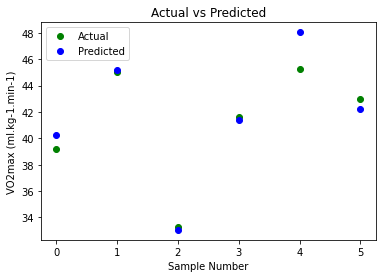

In [195]:
#Visualising the Actual and predicted Result
plt.plot(y_test, 'o',color = 'green', label = 'Actual')
plt.plot(y_pred, 'o',color = 'blue', label = 'Predicted')
plt.xlabel('Sample Number')
plt.ylabel('VO2max (ml.kg-1.min-1)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [196]:
print("mean squared error: ", mean_squared_error(y_test, y_pred)) #compute MSE
print("r_square score: ", r2_score(y_test, y_pred)) # compute R2 score (accuracy for regression tasks or continuous data)

mean squared error:  1.534149
r_square score:  0.909877625931643


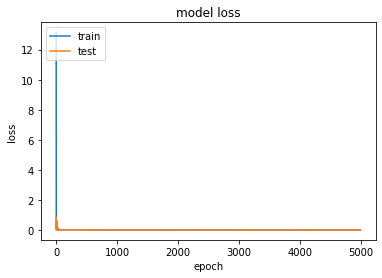

In [197]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [99]:
train_error =  np.abs(y_test - y_pred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.45539713
mean_error:  0.93663913
min_error:  0.37929153
max_error:  1.6126404


# Linear Regression Model

In [79]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred

array([[39.477142],
       [44.661575],
       [32.024307],
       [41.75319 ],
       [48.960342],
       [42.625076]], dtype=float32)

In [80]:
train_error =  np.abs(y_test - y_pred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  1.2376872
mean_error:  1.0109812
min_error:  0.16481781
max_error:  3.6680336


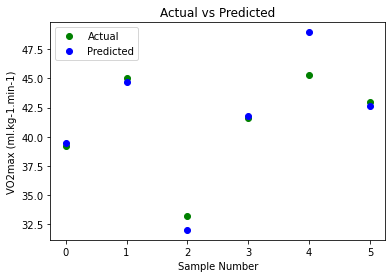

In [81]:
#Visualising the Acutal and predicted Result
plt.plot(y_test,'o', color = 'green', label = 'Actual')
plt.plot(y_pred, 'o',color = 'blue', label = 'Predicted')
plt.xlabel('Sample Number')
plt.ylabel('VO2max (ml.kg-1.min-1)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [73]:
print("mean squared error: ", mean_squared_error(y_test, y_pred))# compute MSE
print("r_square score: ", r2_score(y_test, y_pred))

mean squared error:  0.53558916
r_square score:  0.8864826969103646


# Support Vector Machine

In [83]:
regressor = svm.SVR()
regressor.fit(X_train, y_train.ravel())

SVR()

In [85]:
y_pred = regressor.predict(X_test)
y_pred

array([42.27794046, 42.30342188, 42.30852224, 42.34886889, 42.30178046,
       42.39828801])

In [86]:
train_error =  np.abs(y_test - y_pred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  2.809210509643295
mean_error:  3.2133712768554688
min_error:  0.588673359712395
max_error:  9.153006785551277


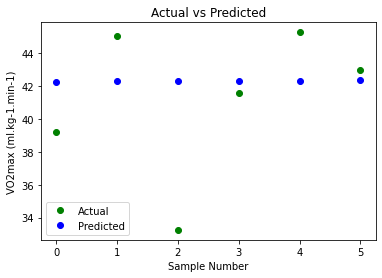

In [87]:
#Visualising the Acutal and predicted Result
plt.plot(y_test,'o', color = 'green', label = 'Actual')
plt.plot(y_pred,'o', color = 'blue', label = 'Predicted')
plt.xlabel('Sample Number')
plt.ylabel('VO2max (ml.kg-1.min-1)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [88]:
print("mean squared error: ", mean_squared_error(y_test, y_pred))# compute MSE
print("r_square score: ", r2_score(y_test, y_pred))

mean squared error:  18.15518504116259
r_square score:  -0.06651199420853926


# Multi Layer Perceptron

In [24]:
model = MLPRegressor()
model.fit(X_train, y_train.ravel())

C:\Users\atiqa\anaconda3\envs\py38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [25]:
y_pred = model.predict(X_test)
y_pred

array([10.56890793, 10.45175605, 10.54143624, 10.4440759 , 10.57835289,
       10.55888667])

In [26]:
train_error =  np.abs(y_test - y_pred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  4.1262538365742145
mean_error:  30.707036616355975
min_error:  22.666928330205845
max_error:  34.84823291103817


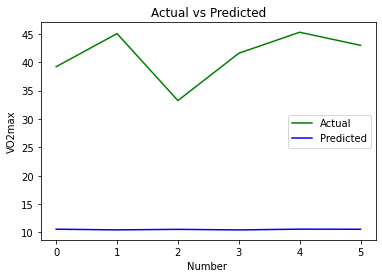

In [27]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Number ')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [28]:
print("mean squared error: ", mean_squared_error(y_test, y_pred))# compute MSE
print("r_square score: ", r2_score(y_test, y_pred))

mean squared error:  960.0321740304977
r_square score:  -55.39633119178937
